<a href="https://colab.research.google.com/github/RyanLin-101/Qiu-Lab-Research-Internship/blob/main/GeneticSimulation/RyanLinMendelianGeneticsWithNumpyArrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
def gen(pop_size):
  rng = np.random.default_rng()
  firstGen = np.zeros((pop_size,2))
  for i in range(pop_size):
    if rng.binomial(1,.5, 1)[0] == 0:
      firstGen[i, ] = [0,0]
    else:
      firstGen[i, ] = [1,1]
  return firstGen

In [ ]:
def furtherGen(pop_size, num_gens):
  firstGen = gen(pop_size)
  allGens = []
  allGens.append(firstGen)
  stats = np.array([50,50,0])  ## SULKOW- not necessary [50, 50, 0]  since you randomly chose the 0th generation AND
  # your pop size isn't necessarily 100.
  for genNum in range(num_gens):
    newGen = np.zeros((pop_size, 2))
    Hom0 = 0
    Hom1 = 0
    Het = 0
    for i in range(pop_size):
      parents = np.random.choice(np.arange(pop_size - 1), 2, replace = False)
      newGen[i ,0] = np.random.choice((allGens[genNum])[parents[0]], 1)
      newGen[i ,1] = np.random.choice((allGens[genNum])[parents[1]], 1)
      nNewGen = np.array([newGen[i,]])
      if (nNewGen == [0,0]).all():   #SULKOW - I like your .all() solution.
        Hom0 += 1
      elif (nNewGen == [1,1]).all():
        Hom1 += 1
      else:
        Het += 1
    stats = np.vstack((stats,[Hom0,Hom1,Het]))
    allGens.append(newGen)
  stats = np.column_stack((np.arange(0,stats.shape[0]),stats))

  return stats

In [ ]:
stats = furtherGen(2000, 40)  #SULKOW - pop_size should be >= 2000 to see the
df = pd.DataFrame(stats)
df.columns= ["Gen","Hom0", "Hom1","Het"]
#df

<ipython-input-3-b30183b3533d>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  newGen[i ,0] = np.random.choice((allGens[genNum])[parents[0]], 1)
<ipython-input-3-b30183b3533d>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  newGen[i ,1] = np.random.choice((allGens[genNum])[parents[1]], 1)


<Axes: xlabel='Gen', ylabel='Hom1'>

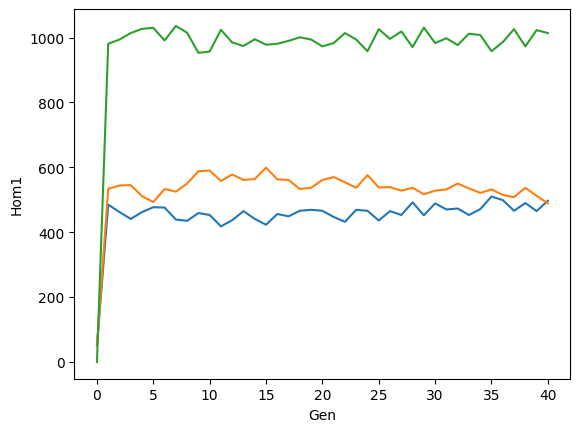

In [ ]:
sns.lineplot(x = df["Gen"] , y = df["Hom1"])#.set(title=.....)
sns.lineplot(x = df["Gen"] , y = df["Hom0"])
sns.lineplot(x = df["Gen"] , y = df["Het"])